In [16]:
# this needs a dbto file that cannot be applied at runtime
# read overl/insert_dtbo.py
# https://discuss.pynq.io/t/pynq3-0-1-allocate-ddr4-returns-buffer-outside-of-address-range/4918/7

import numpy as np
import matplotlib.pyplot as plt

import overlay.phase_correction as phase_correction

# measurement settings
offset_freq = 20e3
trig_val = 500
delay_ch_2 = 0
phase_mult_ch_2 = 1

buffer address, something wrong if not >= 0x1000000000:  0x1000000000
buffer address, something wrong if not >= 0x1000000000:  0x100001b000
buffer address, something wrong if not >= 0x1000000000:  0x1000036000
buffer address, something wrong if not >= 0x1000000000:  0x1000051000
buffer address, something wrong if not >= 0x1000000000:  0x100006c000
buffer address, something wrong if not >= 0x1000000000:  0x1000095000
meas no: 1 meas time avg: 5178.0  us  meas time single: 52.0  us
delay_correction:  5999


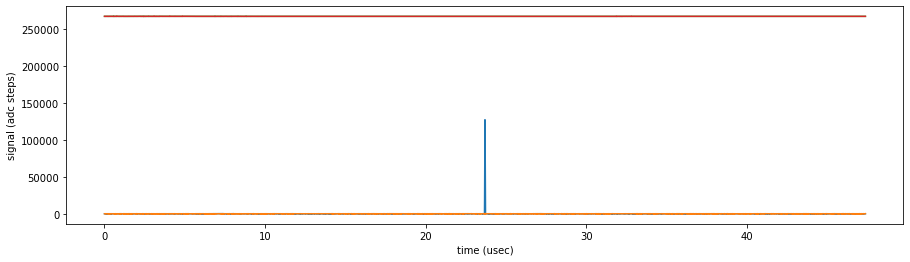

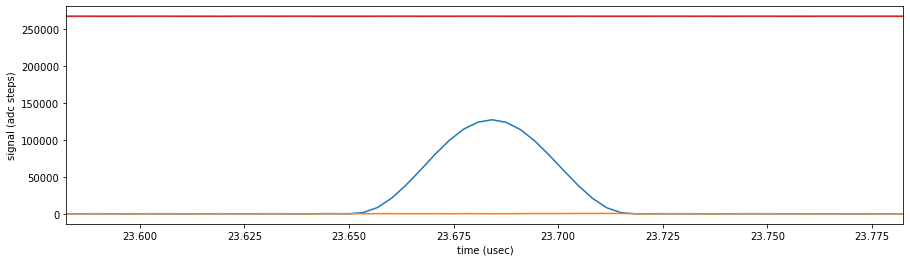

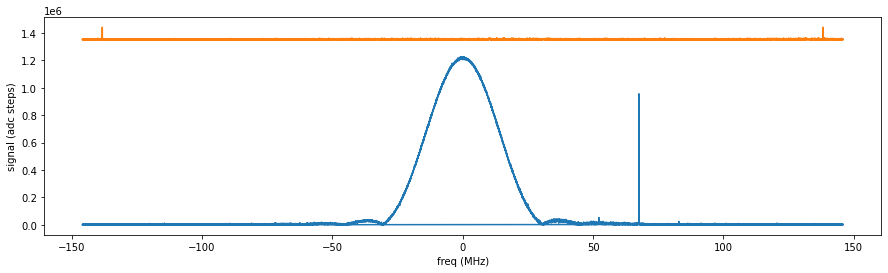

In [18]:
# this needs a dbto file that cannot be applied at runtime
# read overl/insert_dtbo.py
# https://discuss.pynq.io/t/pynq3-0-1-allocate-ddr4-returns-buffer-outside-of-address-range/4918/7

pc = phase_correction(
    offset_freq=offset_freq,
    trig_val=trig_val,
    delay_ch_2=delay_ch_2,
    phase_mult_ch_2=phase_mult_ch_2,
    hardware_avgs=100)

pc.setup_averaging()
pc.start_averaging()
data, data2 = pc.read_avg()
pc.stop()

time_vec = np.arange(0, pc.ifg_samples)/pc.sampling_rate_after_pc
freq = np.fft.fftfreq(data.shape[0], d=time_vec[1]-time_vec[0])

delay_correction = np.argmax(np.abs(data2)) - np.argmax(np.abs(data))
print('delay_correction: ', delay_correction)

plt.figure(figsize=(15,4))
plt.plot(time_vec*1e6, np.real(data))
plt.plot(time_vec*1e6, np.imag(data))
plt.plot(time_vec*1e6, np.real(data2)+2.1*np.max(np.abs(data)))
plt.plot(time_vec*1e6, np.imag(data2)+2.1*np.max(np.abs(data)))
#plt.xlim([0, 1])
plt.xlabel('time (usec)')
plt.ylabel('signal (adc steps)')
plt.show()

plt.figure(figsize=(15,4))
plt.plot(time_vec*1e6, np.real(data))
plt.plot(time_vec*1e6, np.imag(data))
plt.plot(time_vec*1e6, np.real(data2)+2.1*np.max(np.abs(data)))
plt.plot(time_vec*1e6, np.imag(data2)+2.1*np.max(np.abs(data)))
plt.xlim([np.max(time_vec*1e6)/2-0.1, np.max(time_vec*1e6)/2+0.1])
plt.xlabel('time (usec)')
plt.ylabel('signal (adc steps)')
plt.show()

plt.figure(figsize=(15,4))
data_fft = np.fft.fft(data)
data_fft2 = np.fft.fft(data2)
plt.plot(freq*1e-6, np.abs(data_fft))
plt.plot(freq*1e-6, np.abs(data_fft2)+1.1*np.max(np.abs(data_fft)))
#plt.xlim([0, 1])
plt.xlabel('freq (MHz)')
plt.ylabel('signal (adc steps)')
plt.show()

buffer address, something wrong if not >= 0x1000000000:  0x1000000000
buffer address, something wrong if not >= 0x1000000000:  0x100001b000
buffer address, something wrong if not >= 0x1000000000:  0x1000036000
buffer address, something wrong if not >= 0x1000000000:  0x1000051000
buffer address, something wrong if not >= 0x1000000000:  0x100006c000
buffer address, something wrong if not >= 0x1000000000:  0x1000095000
meas no: 1 meas time avg: 50109.0  us  meas time single: 50.0  us
meas no: 2 meas time avg: 49974.0  us  meas time single: 50.0  us
meas no: 3 meas time avg: 51484.0  us  meas time single: 51.0  us
meas no: 4 meas time avg: 48455.0  us  meas time single: 48.0  us
meas no: 5 meas time avg: 49968.0  us  meas time single: 50.0  us
meas no: 6 meas time avg: 49967.0  us  meas time single: 50.0  us
meas no: 7 meas time avg: 49960.0  us  meas time single: 50.0  us
meas no: 8 meas time avg: 49974.0  us  meas time single: 50.0  us
meas no: 9 meas time avg: 49968.0  us  meas time sin

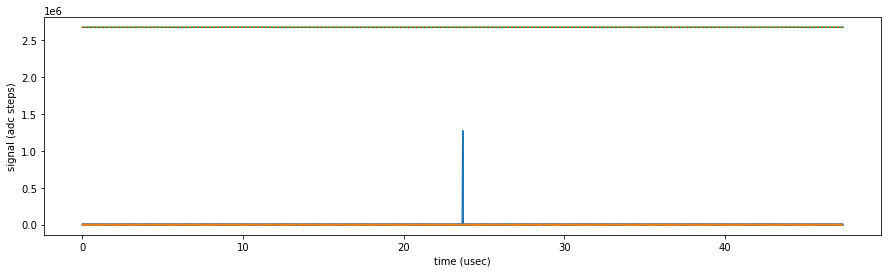

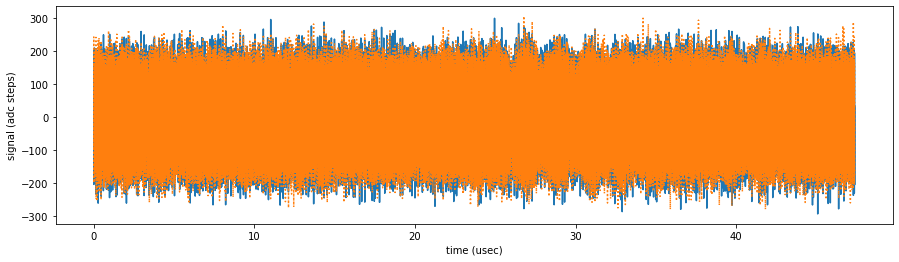

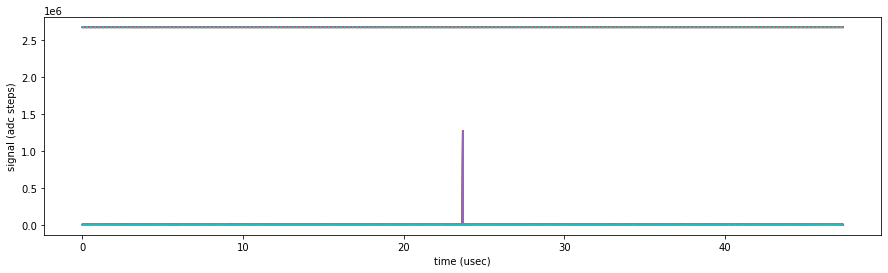

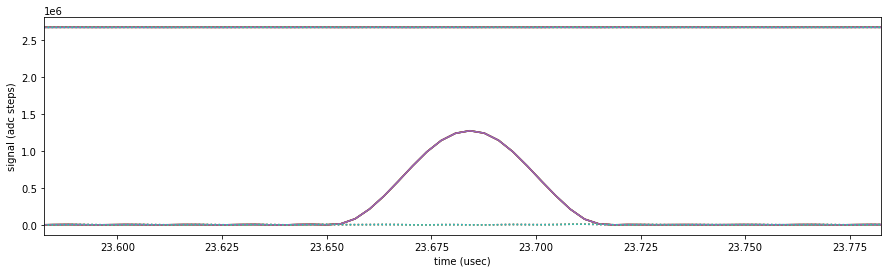

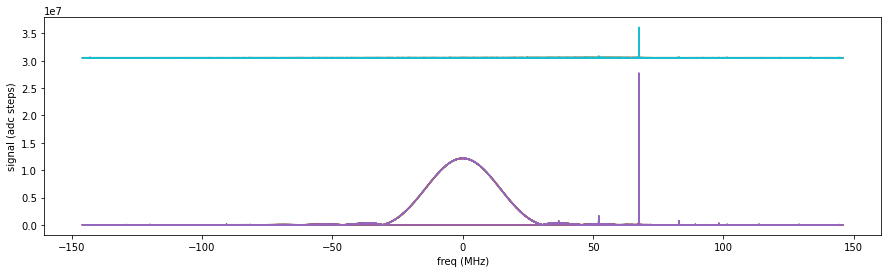

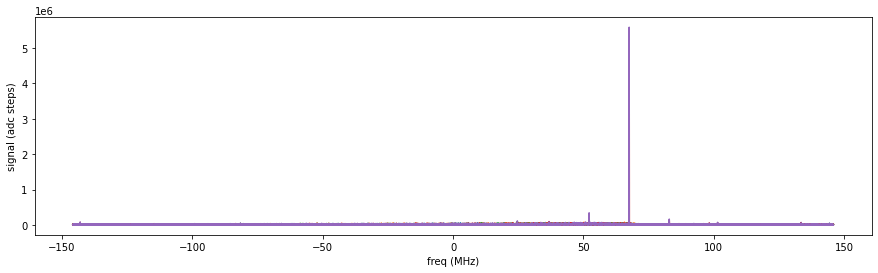

In [8]:

# array to save the result (only needed for software averaging)
software_averages = 3000
software_averages = 20

pc = phase_correction(
    offset_freq=offset_freq,
    trig_val=trig_val,
    delay_ch_2=delay_ch_2,
    phase_mult_ch_2=phase_mult_ch_2,
    hardware_avgs=1000)

data = np.zeros([pc.ifg_samples, software_averages], dtype='complex')
data2 = np.zeros([pc.ifg_samples, software_averages], dtype='complex')

pc.setup_averaging()
pc.start_averaging()
for cnt in np.arange(0, software_averages): # writing only starts when sending 1
    d, d2 = pc.read_avg()
    data[:, cnt-1] = d
    data2[:, cnt-1] = d2
pc.stop()

#np.save('data/cross_r_g_iod/data_ch1_' + str(hardware_avgs)+ '_avgs_x' + str(software_averages), data)
#np.save('data/cross_r_g_iod/data_ch2_' + str(hardware_avgs)+ '_avgs_x' + str(software_averages), data2)

time_vec = np.arange(0, pc.ifg_samples)/pc.sampling_rate_after_pc
freq = np.fft.fftfreq(data.shape[0], d=time_vec[1]-time_vec[0])

datam = np.mean(data, axis=1)
data2m = np.mean(data2, axis=1)
plt.figure(figsize=(15,4))
plt.plot(time_vec*1e6, np.real(datam))
plt.plot(time_vec*1e6, np.imag(datam), ':')
plt.plot(time_vec*1e6, np.real(data2m)+2.1*np.max(np.abs(datam)))
plt.plot(time_vec*1e6, np.imag(data2m)+2.1*np.max(np.abs(datam)), ':')
#plt.xlim([0, 1])
plt.xlabel('time (usec)')
plt.ylabel('signal (adc steps)')
plt.show()

plt.figure(figsize=(15,4))
plt.plot(time_vec*1e6, np.real(data2m))
plt.plot(time_vec*1e6, np.imag(data2m), ':')
#plt.xlim([0, 1])
plt.xlabel('time (usec)')
plt.ylabel('signal (adc steps)')
plt.show()

plt.figure(figsize=(15,4))
plt.plot(time_vec*1e6, np.real(data[:, 0:5]))
plt.plot(time_vec*1e6, np.imag(data[:, 0:5]), ':')
plt.plot(time_vec*1e6, np.real(data2[:, 0:5])+2.1*np.max(np.abs(data[:, 0:5])))
plt.plot(time_vec*1e6, np.imag(data2[:, 0:5])+2.1*np.max(np.abs(data[:, 0:5])), ':')
#plt.xlim([0, 1])
plt.xlabel('time (usec)')
plt.ylabel('signal (adc steps)')
plt.show()

plt.figure(figsize=(15,4))
plt.plot(time_vec*1e6, np.real(data[:, 0:5]))
plt.plot(time_vec*1e6, np.imag(data[:, 0:5]), ':')
plt.plot(time_vec*1e6, np.real(data2[:, 0:5])+2.1*np.max(np.abs(data[:, 0:5])))
plt.plot(time_vec*1e6, np.imag(data2[:, 0:5])+2.1*np.max(np.abs(data[:, 0:5])), ':')
plt.xlim([np.max(time_vec*1e6)/2-0.1, np.max(time_vec*1e6)/2+0.1])
plt.xlabel('time (usec)')
plt.ylabel('signal (adc steps)')
plt.show()

plt.figure(figsize=(15,4))
data_fft = np.fft.fft(data[:, 0:5], axis=0)
data_fft2 = np.fft.fft(data2[:, 0:5], axis=0)
plt.plot(freq*1e-6, np.abs(data_fft[:, 0:5]))
plt.plot(freq*1e-6, np.abs(data_fft2[:, 0:5])+1.1*np.max(np.abs(data_fft[:, 0:5])))
#plt.xlim([0, 1])
plt.xlabel('freq (MHz)')
plt.ylabel('signal (adc steps)')
plt.show()

plt.figure(figsize=(15,4))
plt.plot(freq*1e-6, np.abs(data_fft2[:, 0:5]))
#plt.xlim([0, 1])
plt.xlabel('freq (MHz)')
plt.ylabel('signal (adc steps)')
plt.show()

buffer address, something wrong if not >= 0x1000000000:  0x1000000000
buffer address, something wrong if not >= 0x1000000000:  0x100008e000
buffer address, something wrong if not >= 0x1000000000:  0x100011c000
buffer address, something wrong if not >= 0x1000000000:  0x1000145000


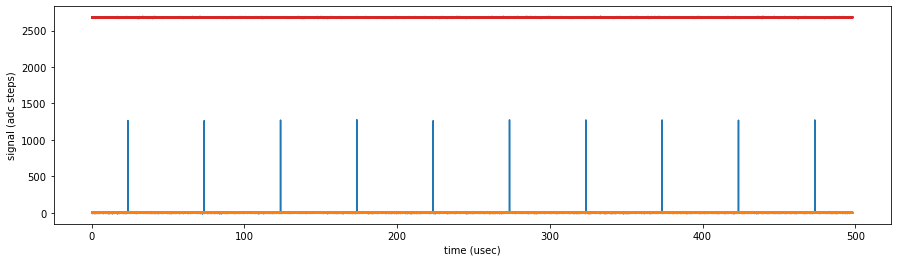

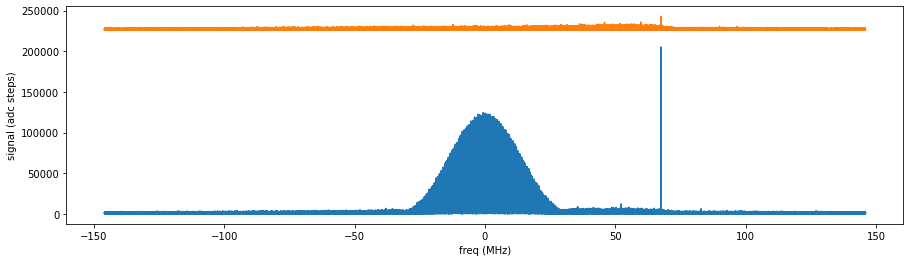

In [9]:
pc = phase_correction(
    offset_freq=offset_freq,
    trig_val=trig_val,
    delay_ch_2=delay_ch_2,
    phase_mult_ch_2=phase_mult_ch_2)

num_write_samples = pc.ifg_samples/0.95*10

pc.setup_full_data_writing(num_write_samples, corrected=True)
data, data2 = pc.read_full_data(corrected=True)

time_vec = np.arange(0, data.size)/pc.sampling_rate_after_pc
freq = np.fft.fftfreq(data.shape[0], d=time_vec[1]-time_vec[0])

if 1:
    plt.figure(figsize=(15,4))
    plt.plot(time_vec*1e6, np.real(data))
    plt.plot(time_vec*1e6, np.imag(data))
    plt.plot(time_vec*1e6, np.real(data2)+2.1*np.max(np.abs(data)))
    plt.plot(time_vec*1e6, np.imag(data2)+2.1*np.max(np.abs(data)))
    #plt.xlim([0, 1])
    plt.xlabel('time (usec)')
    plt.ylabel('signal (adc steps)')
    plt.show()

    plt.figure(figsize=(15,4))
    data_fft = np.fft.fft(data)
    data_fft2 = np.fft.fft(data2)
    plt.plot(freq*1e-6, np.abs(data_fft))
    plt.plot(freq*1e-6, np.abs(data_fft2)+1.1*np.max(np.abs(data_fft)))
    #plt.xlim([0, 1])
    plt.xlabel('freq (MHz)')
    plt.ylabel('signal (adc steps)')
    plt.show()

#np.save('data/cross_g_g/data_ch1_orig_corrected', data)
#np.save('data/cross_g_g/data_ch2_orig_corrected', data2)


buffer address, something wrong if not >= 0x1000000000:  0x1000000000
buffer address, something wrong if not >= 0x1000000000:  0x1000095000
buffer address, something wrong if not >= 0x1000000000:  0x100012a000
buffer address, something wrong if not >= 0x1000000000:  0x1000153000


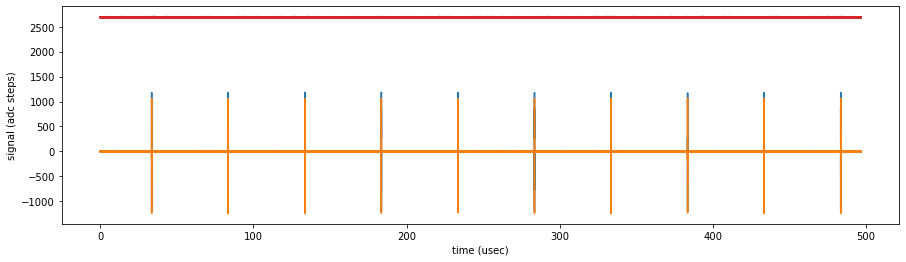

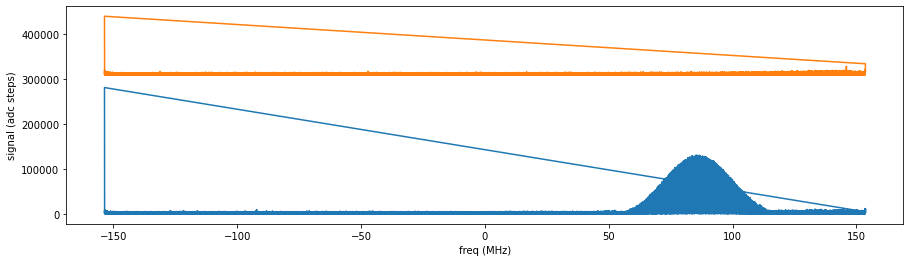

In [10]:
pc = phase_correction(
    offset_freq=offset_freq,
    trig_val=trig_val,
    delay_ch_2=delay_ch_2,
    phase_mult_ch_2=phase_mult_ch_2)

num_write_samples = pc.ifg_samples/0.95/0.95*10

pc.setup_full_data_writing(num_write_samples, corrected=False)
data, data2 = pc.read_full_data(corrected=False)

time_vec = np.arange(0, data.size)/pc.sampling_rate_after_hilbert
freq = np.fft.fftfreq(data.shape[0], d=time_vec[1]-time_vec[0])

if 1:
    plt.figure(figsize=(15,4))
    plt.plot(time_vec*1e6, np.real(data))
    plt.plot(time_vec*1e6, np.imag(data))
    plt.plot(time_vec*1e6, np.real(data2)+2.1*np.max(np.abs(data)))
    plt.plot(time_vec*1e6, np.imag(data2)+2.1*np.max(np.abs(data)))
    #plt.xlim([0, 1])
    plt.xlabel('time (usec)')
    plt.ylabel('signal (adc steps)')
    plt.show()

    plt.figure(figsize=(15,4))
    data_fft = np.fft.fft(data)
    data_fft2 = np.fft.fft(data2)
    plt.plot(freq*1e-6, np.abs(data_fft))
    plt.plot(freq*1e-6, np.abs(data_fft2)+1.1*np.max(np.abs(data_fft)))
    #plt.xlim([0, 1])
    plt.xlabel('freq (MHz)')
    plt.ylabel('signal (adc steps)')
    plt.show()

#np.save('data/cross_g_g/data_ch1_orig', data)
#np.save('data/cross_g_g/data_ch2_orig', data2)

buffer address, something wrong if not >= 0x1000000000:  0x1000000000
buffer address, something wrong if not >= 0x1000000000:  0x100004e000
buffer address, something wrong if not >= 0x1000000000:  0x1000077000


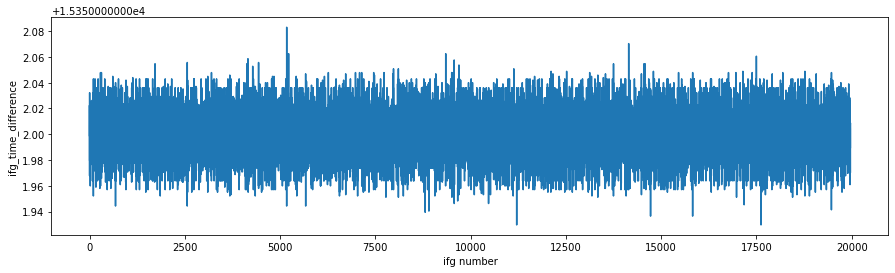

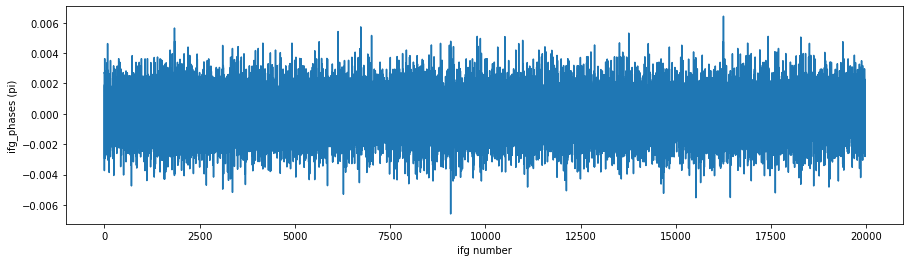

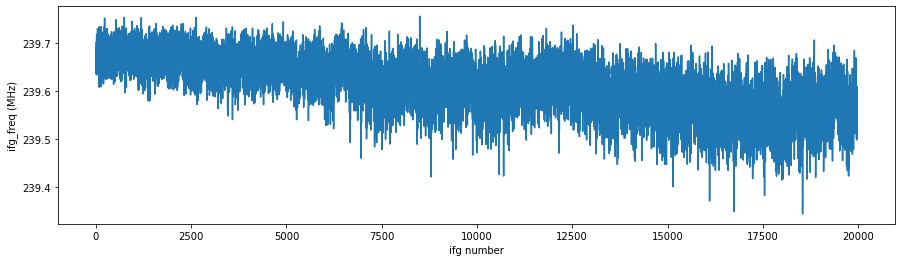

In [2]:
pc = phase_correction(
    offset_freq=offset_freq,
    trig_val=trig_val,
    delay_ch_2=delay_ch_2,
    phase_mult_ch_2=phase_mult_ch_2)

num_write_samples = 20000
pc.setup_log_data_writing(num_write_samples)
delta_times, phases, center_freqs = pc.read_log_data()

plt.figure(figsize=(15,4))
plt.plot(delta_times)
#plt.xlim([-10, 1000])
plt.xlabel('ifg number')
plt.ylabel('ifg_time_difference')
plt.show()

plt.figure(figsize=(15,4))
plt.plot(np.diff(np.unwrap(phases*np.pi))/np.pi)
#plt.xlim([-10, 1000])
plt.xlabel('ifg number')
plt.ylabel('ifg_phases (pi)')
plt.show()

plt.figure(figsize=(15,4))
plt.plot(center_freqs/1e6)
#plt.xlim([-10, 1000])
plt.xlabel('ifg number')
plt.ylabel('ifg_freq (MHz)')
plt.show()